In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest
from cycler import cycler


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Identifying False Postive Rate (% of nonessential genes depleted across targeting guides) from various CRISPRko Cas9 libraries to confirm that Jacquere demonstrates adequate performance despite the objective in its design to optimize the False Negative Rate.

To retrieve guide mappings in GENCODE 47, guide sequences are inserted into the GPP Internal LIMS tool 

In [2]:
path_to_annotations="../Data/GENCODE47 Mappings of CRISPRko Cas9 Genome Wide Libraries/"

## GeCKO v2 (2014)
6 guides/gene

In [3]:
gecko_a=pd.read_csv(path_to_annotations+"gecko_a_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
gecko_b=pd.read_csv(path_to_annotations+"gecko_b_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
gecko=pd.concat([gecko_a,gecko_b])
gecko_guides= gecko["Target Sequence"].tolist()

## Avana (2016)
4 guides/gene screened for DepMap. Downloaded from [DepMap](https://depmap.org/portal/data_page/?tab=allData&releasename=DepMap+Public+24Q4&filename=AvanaGuideMap.csv)

In [4]:
avana=pd.read_csv(path_to_annotations+"avana_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
avana_guides= avana["Target Sequence"].tolist()

## Brunello (2016)


In [5]:
brunello=pd.read_csv(path_to_annotations+"brunello_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
brunello_guides= brunello["Target Sequence"].tolist()

## Human Sanger Genome Wide Library v1 (2016)

human genome-wide CRISPR library (v1) consisting of 90,709 gRNAs targeting a total of 18,010 genes 

from [Tzelepis 2016](https://pmc.ncbi.nlm.nih.gov/articles/PMC5081405/#mmc2)

used for [Project Score](https://score.depmap.sanger.ac.uk/documentation) 

note: I manually curated the hsangerv1.csv file from the MinLibCas9 github MasterLib_v1 [file](https://github.com/EmanuelGoncalves/crispy/blob/master/notebooks/minlib/libraries/MasterLib_v1.csv.gz) to be 20 nt long

In [6]:
hsangerv1=pd.read_csv(path_to_annotations+"hsangerv1_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
hsangerv1_guides= hsangerv1["Target Sequence"].tolist()

## TKOv3 (2017)
[TKOv3 Library Introduction](https://academic.oup.com/g3journal/article/7/8/2719/6031511?login=true)
70,948 gRNAs targeting 18,053 protein-coding genes (up to 4 sgRNA/gene)

In [7]:
tkov3=pd.read_csv(path_to_annotations+"tkov3_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
tkov3_guides= tkov3["Target Sequence"].tolist()

## Gattinara (2018)

In [8]:
gattinara=pd.read_csv(path_to_annotations+"gattinara_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
gattinara_guides= gattinara["Target Sequence"].tolist()

## VBC (2020)
Represents the top 6 guide picks with the highest VBC scores, downloaded from vbc-score.org

In [9]:
vbc=pd.read_csv(path_to_annotations+"vbc_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
vbc_guides= vbc["Target Sequence"].tolist()

## MinLibCas9 (2021)
[source: Goncalves et al 2021](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-021-02268-4#Sec15)
covers 18,761 protein-coding genes with 37,522 sgRNAs (33,986 Project Score; 1732 Brunello; 1493 Avana and 311 TKOv3). Preferentially selected guides with demonstrated activity in Project Score data.

In [10]:
minlibcas9=pd.read_csv(path_to_annotations+"minlibcas9_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
minlibcas9_guides= minlibcas9["Target Sequence"].tolist()

## Jacquere (2025)

In [11]:
jacquere= pd.read_csv(path_to_annotations+"jacquere_quota3_adhoc_sgRNA_disco_GRCh38_Ensembl_SpyoCas9Ko_strict.csv")
jacquere_guides= jacquere["Target Sequence"].tolist()

# Get False Positive Rates from DeWeirdt 2022 tiling

In [12]:
rs3val_zscores= pd.read_csv("../../2. Developing promiscuous classifier/Data/rs3valdata_updatedmappings_zscore.csv")
rs3val_zscores

Unnamed: 0        sgRNA Sequence  sgRNA_lfc       Target Sequence  \
0               0  AAAAAAAAGCACTGTCATGC   1.551436  AAAAAAAAGCACTGTCATGC   
1               1  AAAAAAAGCACTGTCATGCA   0.879857  AAAAAAAGCACTGTCATGCA   
2               2  AAAAAAAGGGAGGACCACTG  -0.717881  AAAAAAAGGGAGGACCACTG   
3               3  AAAAAAAGGGCTGCCCCAAA  -0.537565  AAAAAAAGGGCTGCCCCAAA   
4               4  AAAAAAAGTAGTGTGAAGTC  -0.790484  AAAAAAAGTAGTGTGAAGTC   
...           ...                   ...        ...                   ...   
84340       84340  TTTGTTGTATGATAAACATC  -1.194462  TTTGTTGTATGATAAACATC   
84341       84341  TTTGTTTCAGACTTTGTTTC   0.859021  TTTGTTTCAGACTTTGTTTC   
84342       84342  TTTGTTTCTCAGGACCGCAT  -3.089690  TTTGTTTCTCAGGACCGCAT   
84343       84343  TTTGTTTCTCTTTCTACAAG   0.684651  TTTGTTTCTCTTTCTACAAG   
84344       84344  TTTGTTTGAAATACAGATGA   1.643931  TTTGTTTGAAATACAGATGA   

                                  On-target Gene Symbols Notes  \
0                                                C8orf17   NaN   
1                                                C8orf17   NaN   
2                                                  WDR55   NaN   
3                                                  TOP2A   NaN   
4                                                 LUC7L3   NaN   
...                                                  ...   ...   
84340                                               UPF2   NaN   
84341                                              ITGAV   NaN   
84342                                               DDB1   NaN   
84343                                             HEATR1   NaN   
84344  (ENSG00000290348),(ENSG00000293249),(ENSG00000...   NaN   

       noness_targeting  z_scored_sgRNA_lfc  
0                 False            1.801807  
1                 False            0.583091  
2                 False           -2.316328  
3                 False           -1.989108  
4                 False           -2.448081  
...                 ...                 ...  
84340             False           -3.181181  
84341             False            0.545279  
84342             False           -6.620457  
84343             False            0.228851  
84344             False            1.969658  

[84345 rows x 8 columns]

In [13]:
#get essential vs nonessential classifications 

noness_genes = pd.read_csv("../../2. Developing promiscuous classifier/Data/AchillesNonessentialControls.csv")
noness_genes["Gene"]=noness_genes["Gene"].apply(lambda x: x.split("(")[0])
#remove space from gene name 
noness_genes["Gene"]=noness_genes["Gene"].str.replace(" ","")
noness_gene_list=noness_genes["Gene"].tolist()

essential_genes = pd.read_csv("../../2. Developing promiscuous classifier/Data/AchillesCommonEssentialControls.csv")
essential_genes["Gene"]=essential_genes["Gene"].apply(lambda x: x.split("(")[0])
#remove space from gene name 
essential_genes["Gene"]=essential_genes["Gene"].str.replace(" ","")
essential_gene_list=essential_genes["Gene"].tolist()

rs3val_zscores["is_essential"]=rs3val_zscores["On-target Gene Symbols"].isin(essential_gene_list)
rs3val_zscores["is_nonessential"]=rs3val_zscores["On-target Gene Symbols"].isin(noness_gene_list)

print("# essential:",len(rs3val_zscores[rs3val_zscores["is_essential"]]))
print("# nonessential:",len(rs3val_zscores[rs3val_zscores["is_nonessential"]]))

# essential: 31240
# nonessential: 25735


### Merge screen data with libraries

In [14]:
gecko_with_z_scores=rs3val_zscores[rs3val_zscores["sgRNA Sequence"].isin(gecko_guides)].reset_index(drop=True)
gene_avg_z_gecko = (gecko_with_z_scores.groupby(['On-target Gene Symbols',"is_essential","is_nonessential"])
                     .agg(mean_z = ('z_scored_sgRNA_lfc', 'mean'),
                          n_sgrnas = ('z_scored_sgRNA_lfc', 'count'))
                     .reset_index())

avana_with_z_scores=rs3val_zscores[rs3val_zscores["sgRNA Sequence"].isin(avana_guides)].reset_index(drop=True)
gene_avg_z_avana = (avana_with_z_scores.groupby(['On-target Gene Symbols',"is_essential","is_nonessential"])
                     .agg(mean_z = ('z_scored_sgRNA_lfc', 'mean'),
                          n_sgrnas = ('z_scored_sgRNA_lfc', 'count'))
                     .reset_index())

brunello_with_z_scores=rs3val_zscores[rs3val_zscores["sgRNA Sequence"].isin(brunello_guides)].reset_index(drop=True)
gene_avg_z_brunello = (brunello_with_z_scores.groupby(['On-target Gene Symbols',"is_essential","is_nonessential"])
                     .agg(mean_z = ('z_scored_sgRNA_lfc', 'mean'),
                          n_sgrnas = ('z_scored_sgRNA_lfc', 'count'))
                     .reset_index())

hsangerv1_with_z_scores=rs3val_zscores[rs3val_zscores["sgRNA Sequence"].isin(hsangerv1_guides)].reset_index(drop=True)
gene_avg_z_hsangerv1 = (hsangerv1_with_z_scores.groupby(['On-target Gene Symbols',"is_essential","is_nonessential"])
                     .agg(mean_z = ('z_scored_sgRNA_lfc', 'mean'),
                          n_sgrnas = ('z_scored_sgRNA_lfc', 'count'))
                     .reset_index())

tkov3_with_z_scores=rs3val_zscores[rs3val_zscores["sgRNA Sequence"].isin(tkov3_guides)].reset_index(drop=True)
gene_avg_z_tkov3 = (tkov3_with_z_scores.groupby(['On-target Gene Symbols',"is_essential","is_nonessential"])
                     .agg(mean_z = ('z_scored_sgRNA_lfc', 'mean'),
                          n_sgrnas = ('z_scored_sgRNA_lfc', 'count'))
                     .reset_index())


gattinara_with_z_scores=rs3val_zscores[rs3val_zscores["sgRNA Sequence"].isin(gattinara_guides)].reset_index(drop=True)
gene_avg_z_gattinara = (gattinara_with_z_scores.groupby(['On-target Gene Symbols',"is_essential","is_nonessential"])
                     .agg(mean_z = ('z_scored_sgRNA_lfc', 'mean'),
                          n_sgrnas = ('z_scored_sgRNA_lfc', 'count'))
                     .reset_index())

vbc_with_z_scores=rs3val_zscores[rs3val_zscores["sgRNA Sequence"].isin(vbc_guides)].reset_index(drop=True)
gene_avg_z_vbc = (vbc_with_z_scores.groupby(['On-target Gene Symbols',"is_essential","is_nonessential"])
                     .agg(mean_z = ('z_scored_sgRNA_lfc', 'mean'),
                          n_sgrnas = ('z_scored_sgRNA_lfc', 'count'))
                     .reset_index())

minlibcas9_with_z_scores=rs3val_zscores[rs3val_zscores["sgRNA Sequence"].isin(minlibcas9_guides)].reset_index(drop=True)
gene_avg_z_minlibcas9 = (minlibcas9_with_z_scores.groupby(['On-target Gene Symbols',"is_essential","is_nonessential"])
                     .agg(mean_z = ('z_scored_sgRNA_lfc', 'mean'),
                          n_sgrnas = ('z_scored_sgRNA_lfc', 'count'))
                     .reset_index())

jacquere_with_z_scores=rs3val_zscores[rs3val_zscores["sgRNA Sequence"].isin(jacquere_guides)].reset_index(drop=True)
gene_avg_z_jacquere = (jacquere_with_z_scores.groupby(['On-target Gene Symbols',"is_essential","is_nonessential"])
                     .agg(mean_z = ('z_scored_sgRNA_lfc', 'mean'),
                          n_sgrnas = ('z_scored_sgRNA_lfc', 'count'))
                     .reset_index())


Get # nonessential-targeting guides in each library that do not deplete

In [15]:
gene_avg_z_gecko_nonessentials=gene_avg_z_gecko[gene_avg_z_gecko["is_nonessential"]].reset_index(drop=True)
gene_avg_z_gecko_nonessentials["z>-2"]=gene_avg_z_gecko_nonessentials["mean_z"]>-2
gene_avg_z_gecko_nonessentials["z>-3"]=gene_avg_z_gecko_nonessentials["mean_z"]>-3
gene_avg_z_gecko_nonessentials["z>-4"]=gene_avg_z_gecko_nonessentials["mean_z"]>-4
gecko_FNR_zneg2=len(gene_avg_z_gecko_nonessentials[gene_avg_z_gecko_nonessentials["z>-2"]==False])/len(gene_avg_z_gecko_nonessentials)
gecko_FNR_zneg3=len(gene_avg_z_gecko_nonessentials[gene_avg_z_gecko_nonessentials["z>-3"]==False])/len(gene_avg_z_gecko_nonessentials)
gecko_FNR_zneg4=len(gene_avg_z_gecko_nonessentials[gene_avg_z_gecko_nonessentials["z>-4"]==False])/len(gene_avg_z_gecko_nonessentials)


gene_avg_z_avana_nonessentials=gene_avg_z_avana[gene_avg_z_avana["is_nonessential"]].reset_index(drop=True)
gene_avg_z_avana_nonessentials["z>-2"]=gene_avg_z_avana_nonessentials["mean_z"]>-2
gene_avg_z_avana_nonessentials["z>-3"]=gene_avg_z_avana_nonessentials["mean_z"]>-3
gene_avg_z_avana_nonessentials["z>-4"]=gene_avg_z_avana_nonessentials["mean_z"]>-4
avana_FNR_zneg2=len(gene_avg_z_avana_nonessentials[gene_avg_z_avana_nonessentials["z>-2"]==False])/len(gene_avg_z_avana_nonessentials)
avana_FNR_zneg3=len(gene_avg_z_avana_nonessentials[gene_avg_z_avana_nonessentials["z>-3"]==False])/len(gene_avg_z_avana_nonessentials)
avana_FNR_zneg4=len(gene_avg_z_avana_nonessentials[gene_avg_z_avana_nonessentials["z>-4"]==False])/len(gene_avg_z_avana_nonessentials)

gene_avg_z_hsangerv1_nonessentials=gene_avg_z_hsangerv1[gene_avg_z_hsangerv1["is_nonessential"]].reset_index(drop=True)
gene_avg_z_hsangerv1_nonessentials["z>-2"]=gene_avg_z_hsangerv1_nonessentials["mean_z"]>-2
gene_avg_z_hsangerv1_nonessentials["z>-3"]=gene_avg_z_hsangerv1_nonessentials["mean_z"]>-3
gene_avg_z_hsangerv1_nonessentials["z>-4"]=gene_avg_z_hsangerv1_nonessentials["mean_z"]>-4
hsangerv1_FNR_zneg2=len(gene_avg_z_hsangerv1_nonessentials[gene_avg_z_hsangerv1_nonessentials["z>-2"]==False])/len(gene_avg_z_hsangerv1_nonessentials)
hsangerv1_FNR_zneg3=len(gene_avg_z_hsangerv1_nonessentials[gene_avg_z_hsangerv1_nonessentials["z>-3"]==False])/len(gene_avg_z_hsangerv1_nonessentials)
hsangerv1_FNR_zneg4=len(gene_avg_z_hsangerv1_nonessentials[gene_avg_z_hsangerv1_nonessentials["z>-4"]==False])/len(gene_avg_z_hsangerv1_nonessentials)


gene_avg_z_brunello_nonessentials=gene_avg_z_brunello[gene_avg_z_brunello["is_nonessential"]].reset_index(drop=True)
gene_avg_z_brunello_nonessentials["z>-2"]=gene_avg_z_brunello_nonessentials["mean_z"]>-2
gene_avg_z_brunello_nonessentials["z>-3"]=gene_avg_z_brunello_nonessentials["mean_z"]>-3
gene_avg_z_brunello_nonessentials["z>-4"]=gene_avg_z_brunello_nonessentials["mean_z"]>-4
brunello_FNR_zneg2=len(gene_avg_z_brunello_nonessentials[gene_avg_z_brunello_nonessentials["z>-2"]==False])/len(gene_avg_z_brunello_nonessentials)
brunello_FNR_zneg3=len(gene_avg_z_brunello_nonessentials[gene_avg_z_brunello_nonessentials["z>-3"]==False])/len(gene_avg_z_brunello_nonessentials)
brunello_FNR_zneg4=len(gene_avg_z_brunello_nonessentials[gene_avg_z_brunello_nonessentials["z>-4"]==False])/len(gene_avg_z_brunello_nonessentials)

gene_avg_z_tkov3_nonessentials=gene_avg_z_tkov3[gene_avg_z_tkov3["is_nonessential"]].reset_index(drop=True)
gene_avg_z_tkov3_nonessentials["z>-2"]=gene_avg_z_tkov3_nonessentials["mean_z"]>-2
gene_avg_z_tkov3_nonessentials["z>-3"]=gene_avg_z_tkov3_nonessentials["mean_z"]>-3
gene_avg_z_tkov3_nonessentials["z>-4"]=gene_avg_z_tkov3_nonessentials["mean_z"]>-4
tkov3_FNR_zneg2=len(gene_avg_z_tkov3_nonessentials[gene_avg_z_tkov3_nonessentials["z>-2"]==False])/len(gene_avg_z_tkov3_nonessentials)
tkov3_FNR_zneg3=len(gene_avg_z_tkov3_nonessentials[gene_avg_z_tkov3_nonessentials["z>-3"]==False])/len(gene_avg_z_tkov3_nonessentials)
tkov3_FNR_zneg4=len(gene_avg_z_tkov3_nonessentials[gene_avg_z_tkov3_nonessentials["z>-4"]==False])/len(gene_avg_z_tkov3_nonessentials)

gene_avg_z_gattinara_nonessentials=gene_avg_z_gattinara[gene_avg_z_gattinara["is_nonessential"]].reset_index(drop=True)
gene_avg_z_gattinara_nonessentials["z>-2"]=gene_avg_z_gattinara_nonessentials["mean_z"]>-2
gene_avg_z_gattinara_nonessentials["z>-3"]=gene_avg_z_gattinara_nonessentials["mean_z"]>-3
gene_avg_z_gattinara_nonessentials["z>-4"]=gene_avg_z_gattinara_nonessentials["mean_z"]>-4
gattinara_FNR_zneg2=len(gene_avg_z_gattinara_nonessentials[gene_avg_z_gattinara_nonessentials["z>-2"]==False])/len(gene_avg_z_gattinara_nonessentials)
gattinara_FNR_zneg3=len(gene_avg_z_gattinara_nonessentials[gene_avg_z_gattinara_nonessentials["z>-3"]==False])/len(gene_avg_z_gattinara_nonessentials)
gattinara_FNR_zneg4=len(gene_avg_z_gattinara_nonessentials[gene_avg_z_gattinara_nonessentials["z>-4"]==False])/len(gene_avg_z_gattinara_nonessentials)

gene_avg_z_vbc_nonessentials=gene_avg_z_vbc[gene_avg_z_vbc["is_nonessential"]].reset_index(drop=True)
gene_avg_z_vbc_nonessentials["z>-2"]=gene_avg_z_vbc_nonessentials["mean_z"]>-2
gene_avg_z_vbc_nonessentials["z>-3"]=gene_avg_z_vbc_nonessentials["mean_z"]>-3
gene_avg_z_vbc_nonessentials["z>-4"]=gene_avg_z_vbc_nonessentials["mean_z"]>-4
vbc_FNR_zneg2=len(gene_avg_z_vbc_nonessentials[gene_avg_z_vbc_nonessentials["z>-2"]==False])/len(gene_avg_z_vbc_nonessentials)
vbc_FNR_zneg3=len(gene_avg_z_vbc_nonessentials[gene_avg_z_vbc_nonessentials["z>-3"]==False])/len(gene_avg_z_vbc_nonessentials)
vbc_FNR_zneg4=len(gene_avg_z_vbc_nonessentials[gene_avg_z_vbc_nonessentials["z>-4"]==False])/len(gene_avg_z_vbc_nonessentials)

gene_avg_z_minlibcas9_nonessentials=gene_avg_z_minlibcas9[gene_avg_z_minlibcas9["is_nonessential"]].reset_index(drop=True)
gene_avg_z_minlibcas9_nonessentials["z>-2"]=gene_avg_z_minlibcas9_nonessentials["mean_z"]>-2
gene_avg_z_minlibcas9_nonessentials["z>-3"]=gene_avg_z_minlibcas9_nonessentials["mean_z"]>-3
gene_avg_z_minlibcas9_nonessentials["z>-4"]=gene_avg_z_minlibcas9_nonessentials["mean_z"]>-4
minlibcas9_FNR_zneg2=len(gene_avg_z_minlibcas9_nonessentials[gene_avg_z_minlibcas9_nonessentials["z>-2"]==False])/len(gene_avg_z_minlibcas9_nonessentials)
minlibcas9_FNR_zneg3=len(gene_avg_z_minlibcas9_nonessentials[gene_avg_z_minlibcas9_nonessentials["z>-3"]==False])/len(gene_avg_z_minlibcas9_nonessentials)
minlibcas9_FNR_zneg4=len(gene_avg_z_minlibcas9_nonessentials[gene_avg_z_minlibcas9_nonessentials["z>-4"]==False])/len(gene_avg_z_minlibcas9_nonessentials)

gene_avg_z_jacquere_nonessentials=gene_avg_z_jacquere[gene_avg_z_jacquere["is_nonessential"]].reset_index(drop=True)
gene_avg_z_jacquere_nonessentials["z>-2"]=gene_avg_z_jacquere_nonessentials["mean_z"]>-2
gene_avg_z_jacquere_nonessentials["z>-3"]=gene_avg_z_jacquere_nonessentials["mean_z"]>-3
gene_avg_z_jacquere_nonessentials["z>-4"]=gene_avg_z_jacquere_nonessentials["mean_z"]>-4
jacquere_FNR_zneg2=len(gene_avg_z_jacquere_nonessentials[gene_avg_z_jacquere_nonessentials["z>-2"]==False])/len(gene_avg_z_jacquere_nonessentials)
jacquere_FNR_zneg3=len(gene_avg_z_jacquere_nonessentials[gene_avg_z_jacquere_nonessentials["z>-3"]==False])/len(gene_avg_z_jacquere_nonessentials)
jacquere_FNR_zneg4=len(gene_avg_z_jacquere_nonessentials[gene_avg_z_jacquere_nonessentials["z>-4"]==False])/len(gene_avg_z_jacquere_nonessentials)





In [16]:
library_labels=["GeCKOv2",
                "Avana",
                "Brunello",
                "Proj.Score",
                "TKOv3",
                "Gattinara",
                "VBC",
                "MinLib",
                "Jacquere"]
FPR_df=pd.DataFrame({"Z>-2":[gecko_FNR_zneg2,avana_FNR_zneg2,brunello_FNR_zneg2,hsangerv1_FNR_zneg2,tkov3_FNR_zneg2,gattinara_FNR_zneg2,vbc_FNR_zneg2,minlibcas9_FNR_zneg2,jacquere_FNR_zneg2],
             "Z>-3":[gecko_FNR_zneg3,avana_FNR_zneg3,brunello_FNR_zneg3,hsangerv1_FNR_zneg3,tkov3_FNR_zneg3,gattinara_FNR_zneg3,vbc_FNR_zneg3,minlibcas9_FNR_zneg3,jacquere_FNR_zneg3],
              "Z>-4":[gecko_FNR_zneg4,avana_FNR_zneg4,brunello_FNR_zneg4,hsangerv1_FNR_zneg4,tkov3_FNR_zneg4,gattinara_FNR_zneg4,vbc_FNR_zneg4,minlibcas9_FNR_zneg4,jacquere_FNR_zneg4]
             },index=library_labels)
FPR_df=FPR_df.multiply(100).astype(int) #convert decimals to percentages
FPR_df

Z>-2  Z>-3  Z>-4
GeCKOv2        1     0     0
Avana          4     1     0
Brunello       1     0     0
Proj.Score     0     0     0
TKOv3          0     0     0
Gattinara      4     2     1
VBC            0     0     0
MinLib         3     1     0
Jacquere       3     1     0

(0.0, 100.0)

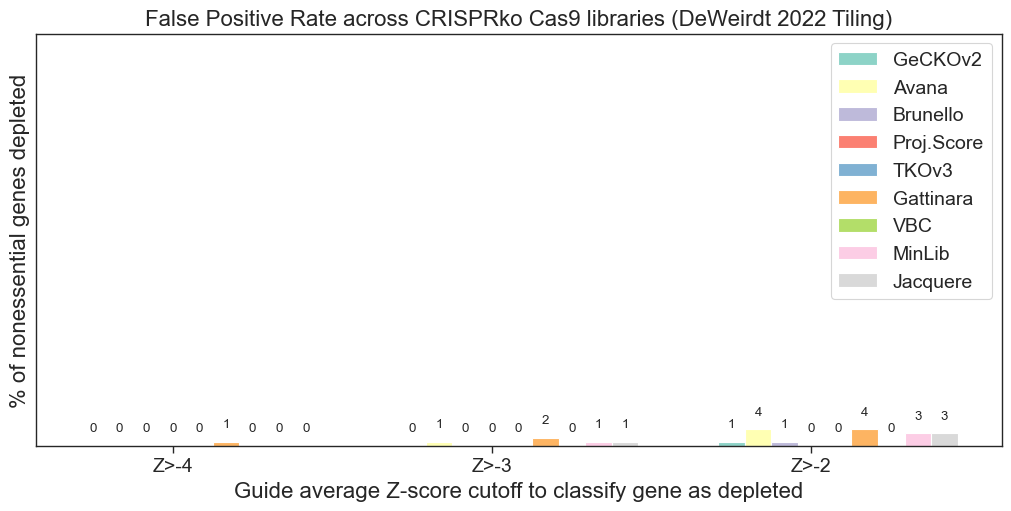

In [17]:
x = np.arange(0,9,3)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(10,5))
ax.set_prop_cycle(cycler('color', plt.cm.Set3.colors))

for library, zcutoff in FPR_df[["Z>-4","Z>-3","Z>-2"]].transpose().items():
    offset = width * multiplier
    rects = ax.bar(x + offset, zcutoff, width, label=library)
    ax.bar_label(rects, padding=8)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of nonessential genes depleted',fontsize=16)
ax.set_xlabel("Guide average Z-score cutoff to classify gene as depleted",fontsize=16)
ax.set_title('False Positive Rate across CRISPRko Cas9 libraries (DeWeirdt 2022 Tiling)',fontsize=16)
ax.set_xticks(x + 0.75,["Z>-4","Z>-3","Z>-2"],fontsize=14)
ax.legend(fontsize=14)
ax.set_yticks([])
ax.set_ylim([0,100])
